In [104]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [105]:
train_ds='../data/train/labeled_data.csv'

In [106]:
train_df=pd.read_csv(train_ds)
train_df=train_df.iloc[:,1:]
train_df

,class_label,content
0,时政,韩美决定每年在黄海举行反潜联合军演(图)中新网10月19日电 据韩国《朝鲜日报》网站19日报...
1,房产,王鹏：商业地产重要的三个环节董利：刚才蔡总介绍了一下台湾的便利店，其实便利店在改变着人们的生...
2,房产,碧桂园股份掉期亏损净利降66%料今年销售额达190亿 杨国强对楼市表示“审慎乐观” 东方早报...
3,房产,刘新虎：关于丽泽商务区的定位问题【刘新虎】：主要是为了学习，因为以前在丰台区开发过项目，20...
4,财经,回顾2010年的邮市：各品种多版块都很给力老票精品很给力。2010年的春天，老票精品吹响了邮...
...,...,...
6995,科技,英媒刊登照片展示全球正在消融的冰川(图)新浪科技讯 北京时间4月30日消息，据英国《卫报》报...
6996,时尚,搭配QA：厚厚羽绒服怎么穿出流行感Q：冬天不得不穿上厚厚的羽绒服御寒，可以大部分羽绒服设计都...
6997,家居,加以零星别致的摆设(图)快乐来临时，一切都是美好的，清新的色调，加以零星别致的摆设，体现出充...
6998,时政,基地组织训练5岁娃娃兵练习射击充当人弹(图)中新网7月11日电 据英国媒体10日报道，英国一...


In [107]:
# 句长分析
train_df['text_len']=train_df['content'].apply(lambda x:len(x))
train_df['text_len'].describe()

count     7000.000000
mean      1074.711286
std       1338.772940
min         17.000000
25%        299.000000
50%        726.000000
75%       1408.250000
max      27467.000000
Name: text_len, dtype: float64

165


Text(0.5, 1.0, 'Text len hist')

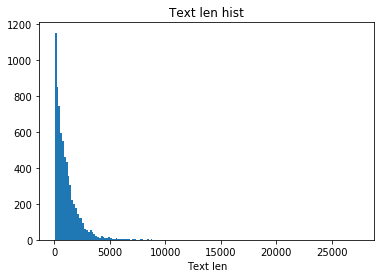

In [108]:
# 句长分布直方图
bins=int((train_df['text_len'].max()-train_df['text_len'].min())**0.5)
print(bins)
plt.hist(train_df['text_len'],bins=bins)
plt.xlabel('Text len')
plt.title('Text len hist')
# 结论： 绝大部分文本分布在5000字符以内

Text(0.5, 1.0, 'Label bar')

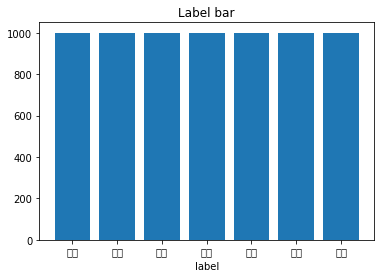

In [109]:
# 类别分布
label_cnts=dict(train_df['class_label'].value_counts())
plt.bar(label_cnts.keys(),label_cnts.values())
plt.xlabel('label')
plt.title('Label bar')
# 结论：均匀分布

In [110]:
# 大于4k 长度的比例
print(len(train_df[train_df['content'].str.len()>4000]['content'])/len(train_df))
# 截断到 4k
idxs=train_df.loc[train_df['content'].str.len()>4000].index
print(train_df.loc[train_df['content'].str.len()>4000].index)
train_df.loc[train_df['content'].str.len()>4000,'content']=train_df.loc[train_df['content'].str.len()>4000,'content'].apply(lambda x:x[:4000].rsplit('。',1)[0])

print(len(train_df[train_df['content'].str.len()>4000]['content'])/len(train_df))
print(list(train_df.iloc[idxs.tolist(),:]['content'].str.len()))
print(train_df.iloc[idxs[1]]['content'])

0.024428571428571428
Int64Index([  47,   63,  128,  180,  310,  371,  529,  535,  599,  622,
            ...
            6692, 6747, 6769, 6778, 6833, 6844, 6845, 6875, 6912, 6956],
           dtype='int64', length=171)
0.0
[3872, 3998, 3970, 3879, 3992, 3948, 3861, 3961, 3632, 3991, 3809, 3977, 3961, 3989, 3930, 3880, 3940, 3986, 3988, 3974, 3978, 3989, 3927, 3995, 3923, 3947, 3981, 3999, 3995, 3936, 3886, 3953, 3985, 3962, 3970, 3843, 3983, 3985, 3984, 3850, 3996, 3981, 3970, 3976, 3923, 3947, 3993, 3969, 3968, 3980, 3979, 3987, 3964, 3934, 3895, 3958, 3992, 3984, 3989, 3988, 3987, 3952, 3970, 3991, 3969, 3780, 3872, 3993, 3996, 3941, 3982, 3971, 3850, 3975, 3960, 3957, 3922, 3991, 3988, 3839, 3994, 3960, 3986, 3945, 3967, 3983, 3982, 3981, 3969, 3871, 3950, 3995, 3666, 3990, 3976, 3984, 3978, 3957, 3800, 3974, 3987, 3855, 3930, 3983, 3984, 3967, 3964, 3991, 3932, 3988, 3968, 3860, 3970, 3981, 3902, 3973, 3986, 3953, 3986, 3963, 3980, 3858, 3970, 3977, 3901, 3991, 3977, 3995, 3974, 3